# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import xgboost
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import recall_score, f1_score, roc_auc_score, make_scorer,accuracy_score ,classification_report, confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
df=pd.read_csv("C:\\Users\\91741\\Downloads\\Restaurant_Reviews.csv")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [64]:
df.shape

(1000, 4)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review            1000 non-null   object
 1   Liked             1000 non-null   int64 
 2   tokenized_review  1000 non-null   object
 3   vector_rep        1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


# Data Visualisation

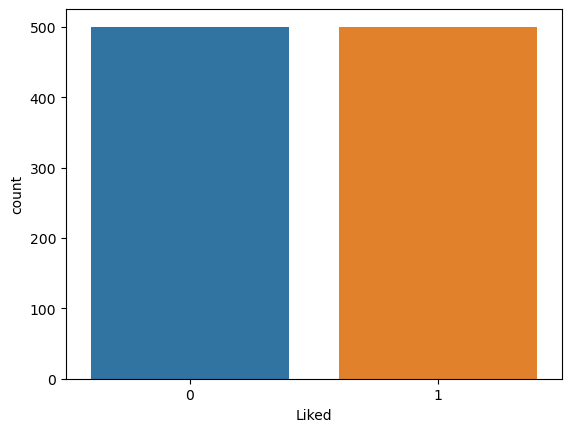

In [3]:
sns.countplot(x='Liked', data=df)
plt.show()

**This shows that dataset is balanced**

# Text Preprocessing

### Lowering of text

In [4]:
df['Review']=df['Review'].str.lower()

### Removing things other than Alphabets

In [5]:
df['Review']=df['Review'].replace('[^a-zA-Z]',' ',regex=True)

### Double Spaces substituted with Single Space

In [6]:
df['Review']=df['Review'].replace(r' +', ' ', regex=True)

### Removing Html Tags

In [7]:
def remove_html_tags(text):
    pattern=re.compile('<*.?>')
    return pattern.sub(r'',text)

In [8]:
df['Review']=df['Review'].apply(remove_html_tags)

### Remove Punctuation

In [9]:
import string 
remove=string.punctuation

In [10]:
def remove_punc(text):
    for char in remove:
        text=text.replace(char,'')
        return text

In [11]:
df['Review']=df['Review'].apply(remove_punc)

### Remove Stopwords

In [12]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a preprocessed text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [13]:
df['Review'].apply(preprocess_text)

0                                        wow loved place
1                                             crust good
2                                    tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                            selection menu great prices
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997                      overall impressed would go back
998    whole experience underwhelming think go ninja ...
999    wasted enough life poured salt wound drawing t...
Name: Review, Length: 1000, dtype: object

### Lemmatization

In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

In [16]:
df['Review'] = df['Review'].apply(lemmatize_text)

In [17]:
df['Review'][0]

'wow loved this place'

In [18]:
df.head()

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture wa just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu wa great and so were...,1


# Splitting of data into dependent and independent variables

In [19]:
X=df['Review']
y=df['Liked']

In [20]:
X

0                                   wow loved this place
1                                      crust is not good
2                not tasty and the texture wa just nasty
3      stopped by during the late may bank holiday of...
4      the selection on the menu wa great and so were...
                             ...                        
995    i think food should have flavor and texture an...
996                              appetite instantly gone
997     overall i wa not impressed and would not go back
998    the whole experience wa underwhelming and i th...
999    then a if i hadn t wasted enough of my life th...
Name: Review, Length: 1000, dtype: object

In [21]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Text to Vector

### 1) Bag of Words=A bag of words is a representation of text that describes the occurrence of words within a document.
### 2) Tfidf Vectorizer(Term Frequency-Inverse Document Frequency) is a commonly used technique in NLP to determine the significance of words in a document .
### 3) Word2Vec= It is a numeric vector input that represents a word in a lower-dimensional space. It allows words with similar meaning to have a similar representation. 

# Bag Of Words

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer()
count_train=CV.fit_transform(X_train)
count_test=CV.transform(X_test)

# Model Building

## Logistic Regression

In [24]:
lgc = LogisticRegression()
lgc.fit(count_train, y_train)
# make predictions on the test data
y_pred = lgc.predict(count_test)
# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# print the result

print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.84      0.81        97
           1       0.84      0.80      0.82       103

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200

Confusion Matrix:

 [[81 16]
 [21 82]]
accuracy score 0.815


## Cross Validation and Hyperparameter Tuning

In [25]:
# Perform cross-validation
cv_scores = cross_val_score(lgc, count_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0], 
    'max_iter': [50, 100, 200]   
}

grid_search = GridSearchCV(lgc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(count_train, y_train)

# Print the best parameters and corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Get the best classifier with tuned hyperparameters
best_clf = grid_search.best_estimator_

# Make predictions on the test data using the best classifier
prediction = best_clf.predict(count_test)
# Calculate metric evaluations and confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, prediction)

# Print the results for the tuned model

print("Tuned Model Classification Report:\n\n", classification_report(y_test, prediction))
print("="*55)
print("Tuned Model Confusion Matrix:\n\n", cm_tuned)
print("="*55)
print("accuracy score",accuracy_score(y_test,prediction))

Cross-Validation Accuracy Scores: [0.775 0.75  0.775 0.8   0.85 ]
Mean Accuracy: 0.7899999999999999
Best Parameters: {'C': 1.0, 'max_iter': 50}
Best Accuracy Score: 0.7899999999999999
Tuned Model Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.84      0.81        97
           1       0.84      0.80      0.82       103

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200

Tuned Model Confusion Matrix:

 [[81 16]
 [21 82]]
accuracy score 0.815


## Passive Aggressive Classifier

In [26]:
clf = PassiveAggressiveClassifier()
clf.fit(count_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(count_test)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# print the result

print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.81      0.79        97
           1       0.81      0.77      0.79       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200

Confusion Matrix:

 [[79 18]
 [24 79]]
accuracy score 0.79


## Cross Validation And Hyperparameter Tuning

In [28]:
# Perform cross-validation
cv_scores = cross_val_score(clf, count_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0],  
    'max_iter': [50, 100, 200] }  

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(count_train, y_train)

# Print the best parameters and corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Get the best classifier with tuned hyperparameters
best_clf = grid_search.best_estimator_

# Make predictions on the test data using the best classifier
prediction = best_clf.predict(count_test)
# Calculate metric evaluations and confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, prediction)

# Print the results for the tuned model

print("Tuned Model Classification Report:\n\n", classification_report(y_test, prediction))
print("="*55)
print("Tuned Model Confusion Matrix:\n\n", cm_tuned)
print("="*55)
print("accuracy score",accuracy_score(y_test,prediction))    

Cross-Validation Accuracy Scores: [0.775   0.76875 0.79375 0.75    0.825  ]
Mean Accuracy: 0.7825000000000001
Best Parameters: {'C': 1.0, 'max_iter': 50}
Best Accuracy Score: 0.78875
Tuned Model Classification Report:

               precision    recall  f1-score   support

           0       0.78      0.81      0.80        97
           1       0.82      0.79      0.80       103

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

Tuned Model Confusion Matrix:

 [[79 18]
 [22 81]]
accuracy score 0.8


## Random Forest Classifier

In [29]:
RFC = RandomForestClassifier()
RFC.fit(count_train, y_train)
# make predictions on the test data
y_pred = RFC.predict(count_test)
# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# print the result

print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.76      0.81      0.79        97
           1       0.81      0.76      0.78       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200

Confusion Matrix:

 [[79 18]
 [25 78]]
accuracy score 0.785


## Cross Validation And Hyperparameter Tuning

In [31]:
# Perform cross-validation
cv_scores = cross_val_score(RFC, count_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],     # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
}

random_search = RandomizedSearchCV(RFC, param_grid, cv=5, scoring='accuracy')
random_search.fit(count_train, y_train)

# Print the best parameters and corresponding accuracy score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

# Get the best classifier with tuned hyperparameters
best_RFC = random_search.best_estimator_

# Make predictions on the test data using the best classifier
predictions= best_RFC.predict(count_test)

# Calculate metric evaluations and confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, predictions)

# Print the results for the tuned model

print("Tuned Model Classification Report:\n\n", classification_report(y_test, predictions))
print("="*55)
print("Tuned Model Confusion Matrix:\n\n", cm_tuned)
print("="*55)
print("accuracy score",accuracy_score(y_test,predictions))

Cross-Validation Accuracy Scores: [0.7875  0.70625 0.75625 0.79375 0.83125]
Mean Accuracy: 0.775
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Accuracy Score: 0.7899999999999999
Tuned Model Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.87      0.83        97
           1       0.86      0.79      0.82       103

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200

Tuned Model Confusion Matrix:

 [[84 13]
 [22 81]]
accuracy score 0.825


## Xgboost Classifier

In [32]:
xgb = XGBClassifier()
xgb.fit(count_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(count_test)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# print the result

print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.72      0.84      0.78        97
           1       0.82      0.70      0.75       103

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200

Confusion Matrix:

 [[81 16]
 [31 72]]
accuracy score 0.765


## Cross Validation And Hyperparameter Tuning

In [33]:
# Perform cross-validation
cv_scores = cross_val_score(xgb,count_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
params={'eta':[0.004,0.006,0.009,0.01,0.03,0.05,0.07,0.09,0.1,0.3],
 'gamma':[5,10,15,20,25,30,40,50,60,70,80,90,100],
 'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
 'min_child_weight':[3,4,5,6,7],
 'subsample':[0.6,0.7,0.8]}

    
random_search = RandomizedSearchCV(xgb, params, cv=5, scoring='accuracy')
random_search.fit(count_train, y_train)

# Print the best parameters and corresponding accuracy score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

# Get the best classifier with tuned hyperparameters
best_clf = random_search.best_estimator_

# Make predictions on the test data using the best classifier
y_pred_tuned = best_clf.predict(count_test)
# Calculate metric evaluations and confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Print the results for the tuned model


print("Tuned Model Classification Report:\n\n", classification_report(y_test, y_pred_tuned))
print("="*55)
print("Tuned Model Confusion Matrix:\n\n", cm_tuned)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred_tuned))

Cross-Validation Accuracy Scores: [0.75625 0.70625 0.73125 0.76875 0.7625 ]
Mean Accuracy: 0.7449999999999999
Best Parameters: {'subsample': 0.6, 'min_child_weight': 3, 'max_depth': 10, 'gamma': 5, 'eta': 0.09}
Best Accuracy Score: 0.6625
Tuned Model Classification Report:

               precision    recall  f1-score   support

           0       0.64      0.85      0.73        97
           1       0.79      0.55      0.65       103

    accuracy                           0.69       200
   macro avg       0.72      0.70      0.69       200
weighted avg       0.72      0.69      0.69       200

Tuned Model Confusion Matrix:

 [[82 15]
 [46 57]]
accuracy score 0.695


# Tfidf Vectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
count_train=tfidf.fit_transform(X_train)
count_test=tfidf.transform(X_test)

# Model Building

## Logistic Regression

In [35]:
lgc = LogisticRegression()
lgc.fit(count_train, y_train)
# make predictions on the test data
y_pred = lgc.predict(count_test)
# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# print the result

print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.80      0.86      0.83        97
           1       0.85      0.80      0.82       103

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200

Confusion Matrix:

 [[83 14]
 [21 82]]
accuracy score 0.825


## Cross Validation And Hyperparameter Tuning

In [37]:
# Perform cross-validation
cv_scores = cross_val_score(lgc, count_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0],  
    'max_iter': [50, 100, 200] }  

grid_search = GridSearchCV(lgc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(count_train, y_train)

# Print the best parameters and corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Get the best classifier with tuned hyperparameters
best_clf = grid_search.best_estimator_

# Make predictions on the test data using the best classifier
prediction = best_clf.predict(count_test)
# Calculate metric evaluations and confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, prediction)

# Print the results for the tuned model

print("Tuned Model Classification Report:\n\n", classification_report(y_test, prediction))
print("="*55)
print("Tuned Model Confusion Matrix:\n\n", cm_tuned)
print("="*55)
print("accuracy score",accuracy_score(y_test,prediction))

Cross-Validation Accuracy Scores: [0.80625 0.75625 0.75625 0.80625 0.83125]
Mean Accuracy: 0.79125
Best Parameters: {'C': 2.0, 'max_iter': 50}
Best Accuracy Score: 0.8012499999999999
Tuned Model Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.87      0.84        97
           1       0.86      0.81      0.83       103

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.83       200

Tuned Model Confusion Matrix:

 [[84 13]
 [20 83]]
accuracy score 0.835


## Passive Aggressive CLassifier

In [38]:
clf = PassiveAggressiveClassifier()
clf.fit(count_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(count_test)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# print the result

print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.80      0.84      0.82        97
           1       0.84      0.81      0.82       103

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

Confusion Matrix:

 [[81 16]
 [20 83]]
accuracy score 0.82


## Cross Validation And Hyperparameter Tuning

In [39]:
# Perform cross-validation
cv_scores = cross_val_score(clf, count_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0],  
    'max_iter': [50, 100, 200]   
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(count_train, y_train)

# Print the best parameters and corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Get the best classifier with tuned hyperparameters
best_clf = grid_search.best_estimator_

# Make predictions on the test data using the best classifier
prediction = best_clf.predict(count_test)
# Calculate metric evaluations and confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, prediction)

# Print the results for the tuned model

print("Tuned Model Classification Report:\n\n", classification_report(y_test, prediction))
print("="*55)
print("Tuned Model Confusion Matrix:\n\n", cm_tuned)
print("="*55)
print("accuracy score",accuracy_score(y_test,prediction))

Cross-Validation Accuracy Scores: [0.78125 0.76875 0.775   0.725   0.8375 ]
Mean Accuracy: 0.7775000000000001
Best Parameters: {'C': 0.1, 'max_iter': 50}
Best Accuracy Score: 0.78125
Tuned Model Classification Report:

               precision    recall  f1-score   support

           0       0.80      0.82      0.81        97
           1       0.83      0.81      0.82       103

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200

Tuned Model Confusion Matrix:

 [[80 17]
 [20 83]]
accuracy score 0.815


## Random Forest Classifier

In [40]:
RFC = RandomForestClassifier()
RFC.fit(count_train, y_train)
# make predictions on the test data
y_pred = RFC.predict(count_test)
# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# print the result

print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.74      0.84      0.79        97
           1       0.82      0.73      0.77       103

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200

Confusion Matrix:

 [[81 16]
 [28 75]]
accuracy score 0.78


## Cross Validation And Hyperparameter Tuning

In [41]:
# Perform cross-validation
cv_scores = cross_val_score(RFC, count_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],     # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
}

random_search = RandomizedSearchCV(RFC, param_grid, cv=5, scoring='accuracy')
random_search.fit(count_train, y_train)

# Print the best parameters and corresponding accuracy score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

# Get the best classifier with tuned hyperparameters
best_RFC = random_search.best_estimator_

# Make predictions on the test data using the best classifier
predictions= best_RFC.predict(count_test)

# Calculate metric evaluations and confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, predictions)

# Print the results for the tuned model

print("Tuned Model Classification Report:\n\n", classification_report(y_test, predictions))
print("="*55)
print("Tuned Model Confusion Matrix:\n\n", cm_tuned)
print("="*55)
print("accuracy score",accuracy_score(y_test,predictions))

Cross-Validation Accuracy Scores: [0.7625  0.6625  0.73125 0.79375 0.79375]
Mean Accuracy: 0.74875
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
Best Accuracy Score: 0.7575000000000001
Tuned Model Classification Report:

               precision    recall  f1-score   support

           0       0.74      0.73      0.74        97
           1       0.75      0.76      0.75       103

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

Tuned Model Confusion Matrix:

 [[71 26]
 [25 78]]
accuracy score 0.745


## Xgboost Classifier

In [42]:
xgb = XGBClassifier()
xgb.fit(count_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(count_test)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# print the result

print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.71      0.80      0.75        97
           1       0.79      0.69      0.74       103

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200

Confusion Matrix:

 [[78 19]
 [32 71]]
accuracy score 0.745


## Cross Validation And Hyperparameter Tuning

In [43]:
# Perform cross-validation
cv_scores = cross_val_score(xgb,count_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
params={'eta':[0.004,0.006,0.009,0.01,0.03,0.05,0.07,0.09,0.1,0.3],
 'gamma':[5,10,15,20,25,30,40,50,60,70,80,90,100],
 'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
 'min_child_weight':[3,4,5,6,7],
 'subsample':[0.6,0.7,0.8]}

    
random_search = RandomizedSearchCV(xgb, params, cv=5, scoring='accuracy')
random_search.fit(count_train, y_train)

# Print the best parameters and corresponding accuracy score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

# Get the best classifier with tuned hyperparameters
best_clf = random_search.best_estimator_

# Make predictions on the test data using the best classifier
y_pred_tuned = best_clf.predict(count_test)
# Calculate metric evaluations and confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Print the results for the tuned model

print("Tuned Model Classification Report:\n\n", classification_report(y_test, y_pred_tuned))
print("="*55)
print("Tuned Model Confusion Matrix:\n\n", cm_tuned)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred_tuned))

Cross-Validation Accuracy Scores: [0.775   0.6375  0.74375 0.75    0.73125]
Mean Accuracy: 0.7275
Best Parameters: {'subsample': 0.7, 'min_child_weight': 6, 'max_depth': 10, 'gamma': 5, 'eta': 0.1}
Best Accuracy Score: 0.6637500000000001
Tuned Model Classification Report:

               precision    recall  f1-score   support

           0       0.64      0.63      0.64        97
           1       0.66      0.67      0.66       103

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.65      0.65      0.65       200

Tuned Model Confusion Matrix:

 [[61 36]
 [34 69]]
accuracy score 0.65


# Word2Vec (Neural Networks Based)

In [44]:
import gensim
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [45]:
wv = api.load('word2vec-google-news-300')

In [46]:
from gensim.utils import simple_preprocess
from gensim.models import word2vec

In [47]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [48]:
df['tokenized_review'] = df['Review'].apply(word_tokenize)

In [49]:
df.head()

,Review,Liked,tokenized_review
0,wow loved this place,1,"[wow, loved, this, place]"
1,crust is not good,0,"[crust, is, not, good]"
2,not tasty and the texture wa just nasty,0,"[not, tasty, and, the, texture, wa, just, nasty]"
3,stopped by during the late may bank holiday of...,1,"[stopped, by, during, the, late, may, bank, ho..."
4,the selection on the menu wa great and so were...,1,"[the, selection, on, the, menu, wa, great, and..."


In [50]:
df['vector_rep']=df['tokenized_review'].apply(sent_vec)

In [51]:
df.head()

,Review,Liked,tokenized_review,vector_rep
0,wow loved this place,1,"[wow, loved, this, place]","[0.01357421875, 0.053125, 0.04287109375, 0.058..."
1,crust is not good,0,"[crust, is, not, good]","[-0.047711181640625, -0.0200927734375, 0.06809..."
2,not tasty and the texture wa just nasty,0,"[not, tasty, and, the, texture, wa, just, nasty]","[0.04456329345703125, 0.06295394897460938, 0.0..."
3,stopped by during the late may bank holiday of...,1,"[stopped, by, during, the, late, may, bank, ho...","[-0.004427083333333333, 0.041651280721028645, ..."
4,the selection on the menu wa great and so were...,1,"[the, selection, on, the, menu, wa, great, and...","[-0.0016733805338541667, 0.09360758463541667, ..."


In [52]:
X=df['vector_rep'].to_list()
y=df['Liked'].to_list()

In [53]:
X[0]

array([ 0.01357422,  0.053125  ,  0.04287109,  0.05895081, -0.05151367,
       -0.03081055,  0.07423096, -0.10703125,  0.02270508,  0.11113281,
        0.01678467, -0.11672363,  0.00616455, -0.04345703,  0.03083496,
        0.07419434,  0.05307617,  0.03364258,  0.03462524, -0.04174805,
       -0.00231934,  0.07910156,  0.0854248 , -0.06704102,  0.03372803,
       -0.01333618,  0.02128906,  0.0129715 ,  0.04265747, -0.05043945,
       -0.09606934,  0.11972656, -0.01859131,  0.04973068,  0.05576477,
       -0.04080963,  0.04460449, -0.00690918,  0.02219849,  0.15546875,
        0.07652893, -0.11584473,  0.14025879,  0.03193359,  0.07636719,
       -0.01558838,  0.02275391, -0.00559082, -0.01722412,  0.04335937,
       -0.04697266,  0.08422852,  0.0107605 ,  0.00449219, -0.02585449,
       -0.00258789,  0.00255127, -0.01152344,  0.0878418 , -0.0862793 ,
       -0.0621582 ,  0.01035156, -0.01832275, -0.10610352,  0.00478516,
       -0.04284668, -0.11657715,  0.02838135, -0.05606689,  0.13

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Logistic Regression

In [56]:
lgc = LogisticRegression()
lgc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lgc.predict(X_test)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# print the result

print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.91      0.84        97
           1       0.90      0.77      0.83       103

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.83       200

Confusion Matrix:

 [[88  9]
 [24 79]]
accuracy score 0.835


## Cross Validation And Hyperparameter Tuning

In [57]:
# Perform cross-validation
cv_scores = cross_val_score(lgc, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0], 
    'max_iter': [50, 100, 200]  }

grid_search = GridSearchCV(lgc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Get the best classifier with tuned hyperparameters
best_clf = grid_search.best_estimator_

# Make predictions on the test data using the best classifier
prediction = best_clf.predict(X_test)
# Calculate metric evaluations and confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, prediction)

# Print the results for the tuned model

print("Tuned Model Classification Report:\n\n", classification_report(y_test, prediction))
print("="*55)
print("Tuned Model Confusion Matrix:\n\n", cm_tuned)
print("="*55)
print("accuracy score",accuracy_score(y_test,prediction))

Cross-Validation Accuracy Scores: [0.825   0.79375 0.8125  0.79375 0.8625 ]
Mean Accuracy: 0.8174999999999999
Best Parameters: {'C': 2.0, 'max_iter': 50}
Best Accuracy Score: 0.8275
Tuned Model Classification Report:

               precision    recall  f1-score   support

           0       0.80      0.91      0.85        97
           1       0.90      0.79      0.84       103

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200

Tuned Model Confusion Matrix:

 [[88  9]
 [22 81]]
accuracy score 0.845


## Passive Aggressive Classifier

In [58]:
clf = PassiveAggressiveClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# print the result

print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.89      0.83        97
           1       0.88      0.76      0.81       103

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200

Confusion Matrix:

 [[86 11]
 [25 78]]
accuracy score 0.82


## Cross Validation And Hyperparameter Tuning

In [59]:
# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0],  
    'max_iter': [50, 100, 200]   
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Get the best classifier with tuned hyperparameters
best_clf = grid_search.best_estimator_

# Make predictions on the test data using the best classifier
prediction = best_clf.predict(X_test)
# Calculate metric evaluations and confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, prediction)

# Print the results for the tuned model

print("Tuned Model Classification Report:\n\n", classification_report(y_test, prediction))
print("="*55)
print("Tuned Model Confusion Matrix:\n\n", cm_tuned)
print("="*55)
print("accuracy score",accuracy_score(y_test,prediction))

Cross-Validation Accuracy Scores: [0.85625 0.79375 0.8375  0.7875  0.83125]
Mean Accuracy: 0.82125
Best Parameters: {'C': 0.5, 'max_iter': 200}
Best Accuracy Score: 0.82875
Tuned Model Classification Report:

               precision    recall  f1-score   support

           0       0.72      0.91      0.80        97
           1       0.88      0.67      0.76       103

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.78       200
weighted avg       0.81      0.79      0.78       200

Tuned Model Confusion Matrix:

 [[88  9]
 [34 69]]
accuracy score 0.785


## Random Forest Classifier

In [60]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
# make predictions on the test data
y_pred = RFC.predict(X_test)
# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# print the result

print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.78      0.84      0.81        97
           1       0.83      0.78      0.80       103

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200

Confusion Matrix:

 [[81 16]
 [23 80]]
accuracy score 0.805


## Cross Validation And Hyperparameter Tuning

In [61]:
# Perform cross-validation
cv_scores = cross_val_score(RFC, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],     # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
}

random_search = RandomizedSearchCV(RFC, param_grid, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

# Get the best classifier with tuned hyperparameters
best_RFC = random_search.best_estimator_

# Make predictions on the test data using the best classifier
predictions= best_RFC.predict(X_test)

# Calculate metric evaluations and confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, predictions)

# Print the results for the tuned model

print("Tuned Model Classification Report:\n\n", classification_report(y_test, predictions))
print("="*55)
print("Tuned Model Confusion Matrix:\n\n", cm_tuned)
print("="*55)
print("accuracy score",accuracy_score(y_test,predictions))

Cross-Validation Accuracy Scores: [0.775   0.74375 0.75625 0.75625 0.8625 ]
Mean Accuracy: 0.7787499999999999
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}
Best Accuracy Score: 0.79625
Tuned Model Classification Report:

               precision    recall  f1-score   support

           0       0.76      0.84      0.79        97
           1       0.83      0.75      0.79       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200

Tuned Model Confusion Matrix:

 [[81 16]
 [26 77]]
accuracy score 0.79


# Xgboost Classifier

In [62]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# print the result

print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.75      0.84      0.79        97
           1       0.83      0.74      0.78       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200

Confusion Matrix:

 [[81 16]
 [27 76]]
accuracy score 0.785


## Cross Validation And Hyperparameter Tuning

In [63]:
# Perform cross-validation
cv_scores = cross_val_score(xgb,X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
params={'eta':[0.004,0.006,0.009,0.01,0.03,0.05,0.07,0.09,0.1,0.3],
 'gamma':[5,10,15,20,25,30,40,50,60,70,80,90,100],
 'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
 'min_child_weight':[3,4,5,6,7],
 'subsample':[0.6,0.7,0.8]}

    
random_search = RandomizedSearchCV(xgb, params, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

# Get the best classifier with tuned hyperparameters
best_clf = random_search.best_estimator_

# Make predictions on the test data using the best classifier
y_pred_tuned = best_clf.predict(X_test)
# Calculate metric evaluations and confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Print the results for the tuned model

print("Tuned Model Classification Report:\n\n", classification_report(y_test, y_pred_tuned))
print("="*55)
print("Tuned Model Confusion Matrix:\n\n", cm_tuned)
print("="*55)
print("accuracy score",accuracy_score(y_test,y_pred_tuned))

Cross-Validation Accuracy Scores: [0.84375 0.7625  0.775   0.71875 0.84375]
Mean Accuracy: 0.7887500000000001
Best Parameters: {'subsample': 0.6, 'min_child_weight': 5, 'max_depth': 30, 'gamma': 10, 'eta': 0.05}
Best Accuracy Score: 0.7862500000000001
Tuned Model Classification Report:

               precision    recall  f1-score   support

           0       0.76      0.87      0.81        97
           1       0.85      0.74      0.79       103

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200

Tuned Model Confusion Matrix:

 [[84 13]
 [27 76]]
accuracy score 0.8


# Conclusion

### Among the vectorization techniques word2vec has resulted in better accuracy than rest other techniques.
### The best accuracy is achieved through Word2Vec using Logistic Regression
### The best accuracy score is 0.845

# Reason for Word2Vec Better Performance

### Word2Vec has better Semantic Understanding than Tfidf and Bag of Words

### Also Word2Vec is a neural network based model and Neural networks, especially deep learning models, have proven to be highly effective in handling the complexity and non-linearity inherent in language data. 